# CSCI 381/780 (Fall 2023) - Project 2

**Due Date: Friday, October 27 by 4 PM**

## Description
In this project you will construct machine learning models on two different real-world datasets using unsupervised learning and regression.

## Instructions
1. In this project you will write code to construct machine learning models and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. There are many Scikit-learn functions that leverage randomness to generate results. For these functions, a pseudorandom generator can be initialized using a seed value by passing the parameter `random_state=XXX`, where `XXX` is some number between 1 and 2^31-1. For each of these functions, **you will utilize your CUNY ID number** to initialize the function. Functions include:
- `ShuffleSplit`
- `KFold`
- `KMeans`
- `GridSearchCV`
- `Lasso`, `Ridge`, `ElasticNet`
- `MLPRegressor`
3. You will **work independently** on the project. Please make use of the *Python Data Science Reference Materials* posted on Blackboard, or **come to office hours should you need further assistance**.
4. You will submit a single Jupyter notebook containing all code and written responses via Blackboard by the due date listed above. 

## Grading

### Running Code
Your Jupyter notebook must be able to run from start to finish **without error**. Please turn any cell that contains scratch work or other non-executable items to *Raw*. **Notebooks that cannot run to completion will receive a grade of 0**.


### Rubric

|**Part**|1.1|1.2|2.1|2.2|2.3|2.4|2.5|2.6|2.7|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|10|25|15|5|5|10|10|10|10|100|

# Part 1: Clustering

In this part of the project, you will be using data collected by the US Geological Survey and the US Forest Service. The data describes various cartographic and geologic features related to forest cover in US wilderness areas, with each sample representing a 30 x 30 meter cell.

The **goal** will be to *identify clusters* that represent forest cover types, and using these clusters *extract relationships* between forest covers and the provided cartographic/geologic features.

In [45]:
cover_columns_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_columns_names + wilderness_cols + soil_col

## 1.1 Load Data
Set the variable `COVER_FILE` to the **full path** to the forest cover dataset (**forest_cover_dataset.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `cover_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. **Center** the training/validation/test splits (fit on the training set, then transform the validation/test sets). 

all features are numbers and total 54 of them in forest cover dataset

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

crimeData = 'crime data.csv'
COVER_FILE = 'forest_cover_dataset.csv'

dataFrame = pd.read_csv(COVER_FILE)
dataFrame.columns = cover_columns_names
dataFrame.info()
dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280250 entries, 0 to 280249
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           280250 non-null  int64
 1   Aspect                              280250 non-null  int64
 2   Slope                               280250 non-null  int64
 3   Horizontal_Distance_To_Hydrology    280250 non-null  int64
 4   Vertical_Distance_To_Hydrology      280250 non-null  int64
 5   Horizontal_Distance_To_Roadways     280250 non-null  int64
 6   Hillshade_9am                       280250 non-null  int64
 7   Hillshade_Noon                      280250 non-null  int64
 8   Hillshade_3pm                       280250 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  280250 non-null  int64
 10  Wilderness_0                        280250 non-null  int64
 11  Wilderness_1                        280250 non-null 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39
0,2719,198,34,134,76,2352,187,245,167,693,...,0,0,0,0,0,0,0,0,0,0
1,3146,152,14,212,41,940,237,239,130,2007,...,0,0,0,0,0,0,0,0,0,0
2,2882,18,18,95,-3,485,203,199,128,342,...,1,0,0,0,0,0,0,0,0,0
3,2912,349,17,283,57,2729,187,210,160,2201,...,0,0,0,0,0,0,0,0,0,0
4,2932,202,11,192,36,5086,215,250,168,1290,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280245,2919,224,18,85,24,451,193,254,193,1436,...,0,0,0,0,0,0,0,0,0,0
280246,2151,114,29,42,29,499,254,197,49,731,...,0,0,0,0,0,0,0,0,0,0
280247,3008,221,14,418,99,5346,202,253,185,1300,...,0,0,0,0,0,0,0,0,0,0
280248,2923,58,12,134,12,2213,228,214,117,424,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dataFrame.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_0                          0
Wilderness_1                          0
Wilderness_2                          0
Wilderness_3                          0
Soil_0                                0
Soil_1                                0
Soil_2                                0
Soil_3                                0
Soil_4                                0
Soil_5                                0
Soil_6                                0
Soil_7                                0
Soil_8                                0
Soil_9                                0
Soil_10                               0


In [48]:
from sklearn.model_selection import ShuffleSplit

X_data = dataFrame
# 60/20/20
split_test = ShuffleSplit(n_splits=1,test_size=2/10, random_state=2385)
for train_index, test_index in split_test.split(X_data):
    X_train_80 = X_data.iloc[train_index,:]
    X_test_20 = X_data.iloc[test_index,:]


split_validation = ShuffleSplit(n_splits=1,test_size=2/8, random_state=2385)
for train_index, test_index in split_validation.split(X_train_80):
    X_train_60 = X_train_80.iloc[train_index,:]
    X_validation_20 = X_train_80.iloc[test_index,:]

print(X_data.shape)
print(X_train_80.shape)
print(X_train_60.shape)
print(X_validation_20.shape)
print(X_test_20.shape)

(280250, 54)
(224200, 54)
(168150, 54)
(56050, 54)
(56050, 54)


In [49]:
scaler = StandardScaler()
scaler = scaler.fit(X_train_60)

X_train_80_center = pd.DataFrame(scaler.transform(X_train_80),columns=cover_columns_names) 
X_train_60_center = pd.DataFrame(scaler.transform(X_train_60),columns=cover_columns_names) 
X_validation_20_center = pd.DataFrame(scaler.transform(X_validation_20),columns=cover_columns_names) 
X_test_20_center = pd.DataFrame(scaler.transform(X_test_20),columns=cover_columns_names) 

print(X_train_80_center.shape)
print(X_train_60_center.shape)
print(X_validation_20_center.shape)
print(X_test_20_center.shape)

(224200, 54)
(168150, 54)
(56050, 54)
(56050, 54)


In [50]:
X_test_20_center

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39
0,0.421767,-0.444619,-0.816267,0.348952,-0.729098,-0.773660,0.785832,0.385276,-0.338313,-0.303970,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
1,-1.410888,-0.310684,-0.415750,-0.759563,-0.571425,-1.119879,1.009214,0.385276,-0.574451,-0.559464,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
2,0.976675,0.751869,0.251779,0.252977,0.392128,1.026933,-0.889537,1.446716,1.472077,-0.343797,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,8.210315,-0.096236
3,-1.359778,0.278631,-0.816267,-1.133867,-0.781655,0.323656,0.339067,1.143447,0.422576,0.213030,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
4,-0.060126,0.600076,1.319825,-0.154918,0.830107,-0.914570,-1.112919,1.547805,1.498315,-0.927676,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,-1.023913,0.341135,-0.015232,-1.133867,-0.904289,0.189122,0.190145,1.345626,0.553764,-0.728541,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
56046,-0.779316,-0.024955,-0.282244,-0.438046,-0.045851,-0.396836,0.823062,0.890724,-0.180888,-0.763108,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
56047,-0.582177,-0.016026,-0.148738,-1.133867,-0.956847,-0.113102,0.860293,0.890724,-0.233363,-0.690217,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236
56048,0.637159,-1.310734,0.518791,1.188736,0.830107,-0.887153,-0.591693,-1.181611,-0.154650,-0.403913,...,-0.217166,-0.319275,-0.292854,-0.05004,-0.042838,-0.008088,0.0,-0.129728,-0.121798,-0.096236


## 1.2 $k$-Means Clustering

1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. Construct models for each value of $k$ specified in the ``k_values`` array below.
2. Apply the trained models to the validation dataset.
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models via their respective ```inertia_```. For the validation models, you can utilize the function ```total_inertia``` provided below.
4. Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. Based on the elbow method, which value of $k$ should be chosen so that the model will generalize to new data?
5. The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with inter-cluster distances from clusters in close proximity to each other. Utilize Scikit-learn's ```silhouette_score``` function [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to compute the silhouette coefficient for all values of $k$ on the *validation* set. Plot these values and determine via the elbow method which value of $k$ should be chosen. How does this value compare to the one chosen using mean inertia?
6. Using whichever value of $k$ you think is the best based on steps 4) and 5), create a plot for each feature that contains [boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) of that feature for each cluster. Based upon these plots, determine which features you think are meaningful in discriminating between the clusters, as well as any other trends you observe.

### Please Read!
You may benefit from parallelizing the creation of the $k$-means models by using the Python package ```joblib```. I've included a code template below that you can customize. For additional details, please refer to [joblib's documentation](https://joblib.readthedocs.io/en/latest/parallel.html).

In [51]:
k_values=list(range(2,11))+[15,20]
#2	3	4	5	6	7	8	9	10	15	20

In [52]:
from joblib import Parallel, delayed, parallel_backend
from sklearn.cluster import KMeans

with parallel_backend("loky", inner_max_num_threads=6):
    k_means_models = [KMeans(n_clusters=i, random_state=2385,n_init='auto',init='k-means++') for i in k_values]

with parallel_backend("loky", inner_max_num_threads=2):
    for i in k_means_models:
        i.fit(X_train_60)

print(f'Number of models: {len(k_means_models)}\nOn X_train_60 data set')
for i in k_means_models:
        print(f'n_clusters={i.get_params()["n_clusters"]} inertia={i.inertia_}')

Number of models: 11
On X_train_60 data set
n_clusters=2 inertia=393241967056.8081
n_clusters=3 inertia=275779076356.2075
n_clusters=4 inertia=212831460137.72647
n_clusters=5 inertia=169070480253.24927
n_clusters=6 inertia=148635933249.15985
n_clusters=7 inertia=128808572802.30055
n_clusters=8 inertia=116270024541.24525
n_clusters=9 inertia=108487525688.84253
n_clusters=10 inertia=98674303515.53696
n_clusters=15 inertia=70544151337.25821
n_clusters=20 inertia=57574161012.6544


In [53]:
#mean inertia_
mean_inertia_list = [model.inertia_ for model in k_means_models]
mean = np.sum(mean_inertia_list)/len(mean_inertia_list)
print(f'mean inertia for tarined on unnormalized data set\n{mean}')

mean inertia for tarined on unnormalized data set
161810695995.54446


In [54]:
#s= KMeans()
#s.predict()
with parallel_backend("loky", inner_max_num_threads=6):
    predicts = [i.predict(X_validation_20)  for i in k_means_models]

print('Labels for X_validation_20')
for i in predicts:
    print(i)

Labels for X_validation_20
[1 1 1 ... 0 0 1]
[1 1 1 ... 0 0 1]
[3 3 3 ... 3 3 1]
[3 3 1 ... 1 3 1]
[3 3 1 ... 3 3 1]
[3 3 1 ... 6 6 1]
[3 3 1 ... 6 6 1]
[8 8 1 ... 3 3 1]
[8 3 1 ... 9 9 1]
[ 8  3  1 ...  9 10  1]
[ 8 13 19 ... 10 10 15]


In [55]:

k_means_models_center = [KMeans(n_clusters=i, random_state=2385,n_init='auto',init='k-means++') for i in k_values]

for i in k_means_models_center:
    i.fit(X_train_60_center)

inertia_center_list = [i.inertia_ for i in k_means_models_center]
print('inertia list\n',inertia_center_list)

# print(f'Number of models: {len(k_means_models_center)}\nOn X_train_60_center data set')
# for i in k_means_models_center:
#         print(f'n_clusters={i.get_params()["n_clusters"]} inertia={i.inertia_}')


inertia list
 [8212665.537803426, 7879085.106436136, 7682358.058679646, 7465134.234241378, 7294308.367309672, 7113480.023687164, 6934816.087050065, 6752283.58353317, 6566685.7682472635, 5691141.634538785, 4815780.453152791]


In [56]:
mean_center= sum(inertia_center_list)/len(inertia_center_list)
print(f'mean inertia for tarined on normalized data set\n{mean_center}')

mean inertia for tarined on normalized data set
6946158.077698135


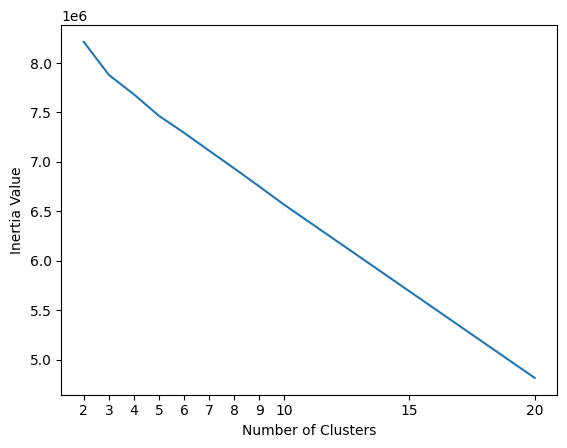

In [57]:
import matplotlib.pyplot as plt
y = inertia_center_list
x = k_values

#plt.style.use("fivethirtyeight")
plt.plot(x, y)
plt.xticks(x)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia Value")
plt.show()

In [58]:

with parallel_backend("loky", inner_max_num_threads=6):
    predicts_center = [i.predict(X_validation_20_center)  for i in k_means_models_center]

for i in predicts_center:
    print(i)

[0 0 0 ... 0 1 0]
[2 2 2 ... 2 0 2]
[2 2 2 ... 2 3 2]
[2 2 2 ... 2 4 2]
[2 2 2 ... 2 4 2]
[2 2 2 ... 2 4 2]
[7 7 7 ... 7 1 7]
[7 8 8 ... 8 1 7]
[7 9 9 ... 9 1 7]
[ 7  9  9 ...  9  1 11]
[ 7  9  9 ...  9  1 11]


In [59]:
from sklearn.metrics import silhouette_score
"""
silhouette_score needs about 6 mins for one k values, 11*6 = 66 mins to finsh
my pc is slow
that's why i commit it out.
but the code is working
"""

'''
silhouette_coefficients = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=2385,n_init='auto',init='k-means++')
    kmeans.fit(X_train_60_center)
    score = silhouette_score(X_train_60_center, kmeans.labels_)
    silhouette_coefficients.append(score)
print(silhouette_coefficients)
y = silhouette_coefficients
x = k_values
plt.plot(x, y)
plt.xticks(x)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()
'''

'\nsilhouette_coefficients = []\nfor k in k_values:\n    kmeans = KMeans(n_clusters=k, random_state=23858431,n_init=\'auto\',init=\'k-means++\')\n    kmeans.fit(X_train_60_center)\n    score = silhouette_score(X_train_60_center, kmeans.labels_)\n    silhouette_coefficients.append(score)\nprint(silhouette_coefficients)\ny = silhouette_coefficients\nx = k_values\nplt.plot(x, y)\nplt.xticks(x)\nplt.xlabel("Number of Clusters")\nplt.ylabel("Silhouette Coefficients")\nplt.show()\n'

In [60]:

def total_inertia(dataset,centers,labels,distance=None,mean=True):
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i,sample in enumerate(dataset):
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

# Part 2: Regression

In this part of the project, you will be utilizing a US database of crime and law enforcement statistics broken down by US Census communities. The **goal** will be to create *regression models* that predict *per capita violent crimes* (the response variable `ViolentCrimesPerPop`) for a given community based on these inputs. 

In [4]:
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

## 2.1 Load Data
Set the variable `CRIME_FILE` to the **full path** to the forest cover dataset (**crime.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `crime_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. Split the **non-test data** (*training* + *validation* data) into **5 folds** for cross-validation purposes.
4. Perform any necessary preprocessing on dataset. This may include:
  * determining if any features should be dropped;
  * handling missing data, through imputation and/or complete case analysis. If you **perform imputation on numerical values**, please use **median** imputation.

**Please note!** The Scikit-learn function `SimpleImputer` does not work as expected when the feature to impute is numerical but the missing values are not. One way to solve this is to first replace the missing values with NaN values (e.g., `np.nan`) using the Pandas Dataframe method `replace` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

127 feattures originally but fold and communityname will be droped so 125
then the 125 feattures are numbers

'fold' and 'communityname' are droped because they seems no meaning here

ViolentCrimesPerPop is the answer that we looking for

In [62]:
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

In [6]:
import pandas as pd
import numpy as np
crimeDataFile = 'crime data.csv'
crimeData = pd.read_csv(crimeDataFile)
crimeData.columns = crime_column_names
crimeData = crimeData.replace('?', np.NaN)
crimeData

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
1,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
4,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1989,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1990,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1991,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [7]:
num_feattures = len(crimeData.columns)
print(f'number of feattures:{num_feattures-1}')
print('and "ViolentCrimesPerPop" as answer')

number of feattures:127
and "ViolentCrimesPerPop" as answer


In [10]:
hasNaN = crimeData.isna().any()
columns_has_nan = crimeData.columns[hasNaN]
print('Columns that have NaN values\n',columns_has_nan)

Columns that have NaN values
 Index(['county', 'community', 'OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop',
       'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


['county', 'community', 'OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop',
       'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq',
       'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
       'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
       'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits',
       'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']

those columns has NaN values

'fold' and 'communityname' is droped because they seems no meaning here

In [11]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.NaN, strategy='median')
for column in  columns_has_nan:
       crimeData[column] = imr.fit_transform(crimeData[[column]])

if 'fold' in crimeData.columns:
       crimeData = crimeData.drop(['fold'],axis=1)
if 'communityname' in crimeData.columns:
       crimeData = crimeData.drop(['communityname'],axis=1)

crimeData

,state,county,community,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,53,23.0,48090.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,...,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.155,0.67
1,24,23.0,48090.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,...,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.155,0.43
2,34,5.0,81440.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,...,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.155,0.12
3,42,95.0,6096.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,...,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.155,0.03
4,6,23.0,48090.0,0.02,0.28,0.06,0.54,1.00,0.25,0.31,...,0.01,0.58,0.10,0.08,0.03,0.75,0.5,0.00,0.155,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,12,23.0,48090.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,...,0.01,0.28,0.05,0.08,0.03,0.75,0.5,0.00,0.155,0.09
1989,6,23.0,48090.0,0.05,0.96,0.46,0.28,0.83,0.32,0.69,...,0.02,0.37,0.20,0.08,0.03,0.75,0.5,0.00,0.155,0.45
1990,9,9.0,80070.0,0.16,0.37,0.25,0.69,0.04,0.25,0.35,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.280,0.23
1991,25,17.0,72600.0,0.08,0.51,0.06,0.87,0.22,0.10,0.58,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.180,0.19


In [12]:
from sklearn.model_selection import ShuffleSplit

X_data = crimeData
# 60/20/20
split_test = ShuffleSplit(n_splits=1,test_size=2/10, random_state=2385)
for train_index, test_index in split_test.split(X_data):
    crimeData_train_80 = X_data.iloc[train_index,:]
    crimeData_test_20 = X_data.iloc[test_index,:]

split_validation = ShuffleSplit(n_splits=1,test_size=2/8, random_state=2385)
for train_index, test_index in split_validation.split(crimeData_train_80):
    crimeData_train_60 = crimeData_train_80.iloc[train_index,:]
    crimeData_validation_20 = crimeData_train_80.iloc[test_index,:]

print('original data set :',X_data.shape)
print('train set 80%     :',crimeData_train_80.shape, len(crimeData_train_80)/len(X_data))
print('train set 60%     :',crimeData_train_60.shape, len(crimeData_train_60)/len(X_data))
print('validation set 20%:',crimeData_validation_20.shape, len(crimeData_validation_20)/len(X_data))
print('test set 20%      :',crimeData_test_20.shape, len(crimeData_test_20)/len(X_data))

original data set : (1993, 126)
train set 80%     : (1594, 126) 0.7997992975413949
train set 60%     : (1195, 126) 0.5995985950827898
validation set 20%: (399, 126) 0.2002007024586051
test set 20%      : (399, 126) 0.2002007024586051


In [13]:
# 5 folds 
from sklearn.model_selection import KFold
skf = KFold(n_splits=5,shuffle=True,random_state=2385)
skf.get_n_splits(crimeData_train_80)

5

## 2.2 Linear Regression

1. Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
2. Report the following performance metrics on the **training and validation sets**:
    *Mean Squared Error*, *Mean Absolute Error*, and the *Coefficient of Determination ($r^2$)*.
    
    You can use the function `p2_metrics` for this purpose. Is this model underfitting the data? Is so, why?
3. Report the weights (coefficients) of the linear model and their associated features in ascending order.

    Larger weights indicate that their corresponding features have more influence in the model. Moreover, negative weights correspond to variables having negative correlation with the response variable, and vice versa.
    
    Using this interpretation, describe the most significant features and their correlation.

In [70]:
#Construct a linear model
from sklearn.linear_model import LinearRegression
X_train_80 = crimeData_train_80.drop(['ViolentCrimesPerPop'],axis=1)
Y_train_80 = crimeData_train_80[['ViolentCrimesPerPop']]

X_train_60 = crimeData_train_60.drop(['ViolentCrimesPerPop'],axis=1)
Y_train_60 = crimeData_train_60[['ViolentCrimesPerPop']]

X_validation_20 = crimeData_validation_20.drop(['ViolentCrimesPerPop'],axis=1)
Y_validation_20 = crimeData_validation_20[['ViolentCrimesPerPop']]

X_test_20 = crimeData_test_20.drop(['ViolentCrimesPerPop'],axis=1)
Y_test_20 = crimeData_test_20[['ViolentCrimesPerPop']]

reg = LinearRegression()
reg.fit(X_train_60,Y_train_60)
reg_y_pred = reg.predict(X_train_60)
reg_metrics = p2_metrics(Y_train_60, reg_y_pred)
print("\nLinearRegression Metrics:")
for metric in reg_metrics:
    print(metric+":",reg_metrics[metric])


LinearRegression Metrics:
mse: 0.014773637415794712
mae: 0.08673547653763267
r2: 0.7235113198459007


In [71]:
def coefficients(estimator, dataset):
    coefficients = estimator.coef_.reshape(-1)
    feature_names = dataset.columns.to_numpy()
    coefficients_with_features = list(zip(coefficients, feature_names))
    # Sort by the absolute value of the coefficient
    coefficients_with_features.sort(key=lambda x: abs(x[0]))
    print("Feature Coefficient Small to Large with absolute value\n")
    index = 1
    for coefficient, feature_name in coefficients_with_features:
        print(f"[{index}] Coefficient: {coefficient}, Feature: {feature_name}")
        index += 1
    
    return coefficients_with_features

In [72]:
reg_coefficient_tuple = coefficients(reg,X_train_80)

Feature Coefficient Small to Large with absolute value

[1] Coefficient: -8.509069081372861e-08, Feature: community
[2] Coefficient: -0.0001480125765261388, Feature: county
[3] Coefficient: -0.00016230779039805993, Feature: LemasPctPolicOnPatr
[4] Coefficient: -0.0001730252285702394, Feature: state
[5] Coefficient: -0.0003599819752142519, Feature: PctSameCity85
[6] Coefficient: 0.002217895065683456, Feature: MedOwnCostPctInc
[7] Coefficient: 0.0026918377696883433, Feature: PctBornSameState
[8] Coefficient: 0.003877435039335103, Feature: MedNumBR
[9] Coefficient: 0.004421047579896746, Feature: pctWPubAsst
[10] Coefficient: -0.0044906732111862635, Feature: PctRecImmig5
[11] Coefficient: 0.005053924885302336, Feature: HispPerCap
[12] Coefficient: -0.005933213925024626, Feature: AsianPerCap
[13] Coefficient: 0.009353513625579735, Feature: MedRentPctHousInc
[14] Coefficient: -0.010265574083055812, Feature: PctEmplProfServ
[15] Coefficient: -0.012339132269341191, Feature: OwnOccHiQuart
[16] 

community has the Smallest coefficient value -9.043768541038347e-08
PersPerOccupHous has the lagerst coefficient value 0.7587779100321257

## 2.3 Linear Regression and PCA

1. Perform principal component analysis on the **training data**. You may use Scikit-learn's `PCA` function for this, which **automatically centers** the data prior to PCA. Using PCA, *choose the number of components* for which the total explained variance is $\ge 99\%$, and report this.
2. After determining the correct number of components, apply the PCA transformation to the **validation** and **test** sets.
3. Create another model via `LinearRegression` but using the data transformed by PCA
Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
4. Report the same performance metrics as in 2.2 on the **validation set**. How does the model's performance compare to that of the model in 2.2?

In [73]:
from sklearn.decomposition import PCA
for i in range(1,10):
    pca = PCA(n_components=i)
    pca.fit(X_train_60)
    sum = 0
    for x in pca.explained_variance_ratio_:
        sum += x
    print(f"Sum: {sum}; \t{pca.n_components_} components explained variance: {pca.explained_variance_ratio_}")

Sum: 0.9999761048568596; 	1 components explained variance: [0.9999761]
Sum: 0.9999991142911995; 	2 components explained variance: [9.99976105e-01 2.30094343e-05]
Sum: 0.999999985620147; 	3 components explained variance: [9.99976105e-01 2.30094343e-05 8.71328948e-07]
Sum: 0.9999999895335977; 	4 components explained variance: [9.99976105e-01 2.30094343e-05 8.71328948e-07 3.91345073e-09]
Sum: 0.999999991921026; 	5 components explained variance: [9.99976105e-01 2.30094343e-05 8.71328948e-07 3.91345073e-09
 2.38742828e-09]
Sum: 0.9999999930593141; 	6 components explained variance: [9.99976105e-01 2.30094343e-05 8.71328948e-07 3.91345073e-09
 2.38742828e-09 1.13828810e-09]
Sum: 0.9999999940466872; 	7 components explained variance: [9.99976105e-01 2.30094343e-05 8.71328948e-07 3.91345073e-09
 2.38742828e-09 1.13828810e-09 9.87373065e-10]
Sum: 0.9999999947057; 	8 components explained variance: [9.99976105e-01 2.30094343e-05 8.71328948e-07 3.91345073e-09
 2.38742828e-09 1.13828810e-09 9.8737306

whne components = 1, explained variance is 0.9999761048568596 which is over 99%

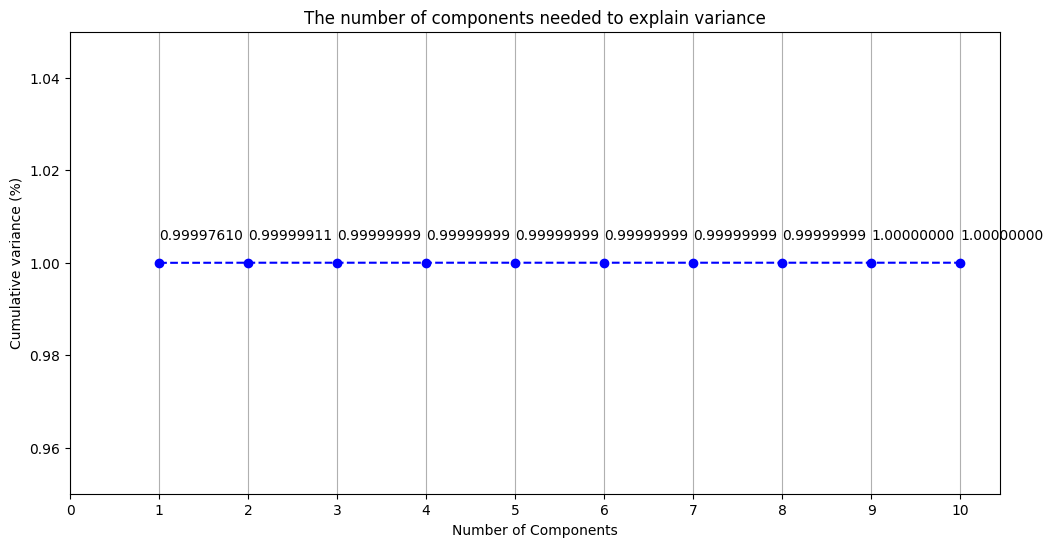

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(10).fit(X_train_60)
# matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.95,1.05)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

for i, v in enumerate(y):
    ax.annotate("{:.8f}".format(v), xy=(i+1,v+0.005), xytext=(0,0), textcoords='offset points')

ax.grid(axis='x')
plt.show()

In [75]:
#2. After determining the correct number of components,
#   apply the PCA transformation to the **validation** and **test** sets.
pca_1 = PCA(1).fit(X_train_60)
reduced_X_train_80 = pca_1.transform(X_train_80)
reduced_X_train_60 = pca_1.transform(X_train_60)
reduced_X_validation_20 = pca_1.transform(X_validation_20)
reduced_X_test_20 = pca_1.transform(X_test_20)
print()

In [76]:
# 3. Create another model via `LinearRegression` but using the data transformed by PCA
# Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
# 4. Report the same performance metrics as in 2.2 on the **validation set**. How does the model's performance compare to that of the model in 2.2?

reg_reduced = LinearRegression()
reg_reduced.fit(reduced_X_train_60,Y_train_60)

reg_y_pred = reg_reduced.predict(reduced_X_validation_20)
reg_metrics = p2_metrics(reduced_X_validation_20, reg_y_pred)
print("\nLinearRegression Metrics:")
for metric in reg_metrics:
    print(metric+":",reg_metrics[metric])


LinearRegression Metrics:
mse: 254856925.9842625
mae: 9182.811987814015
r2: -0.001581016182593764


Metrics
2.2
LinearRegression Metrics:
mse: 0.015371890906027245
mae: 0.08765049573417802
r2: 0.7113396797874576

2.4
LinearRegression Metrics:
mse: 254856925.9842625
mae: 9182.811987814015
r2: -0.001581016182593764

## 2.4 Regularized Regression

### 2.4.1. LASSO

Utilizing *cross-validation* you will construct an $\ell_1$-regularized linear model using Scikit-learn's `LASSO`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` below.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the LASSO model and their associated features in ascending order. Note that LASSO attempts to set as many weights as possible to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero?
 
### Please Read!
There are a few parameters for the `GridSearchCV` and `RandomizedSearchCV` functions that should be set:
- `scoring` - This controls the strategy to evaluate the performance of the cross-validated model on the test set, set it to `p2_metrics_scorer`.
- `refit` - This will refit an estimator using the best found parameters on the whole dataset, set it to `"mse"`
- `cv` - This will enable you to reuse your CV splits created in Part 2.1
- `n_jobs` - Number of jobs to run in parallel, if you have more than one core on your device (you should), set this to as many as you'd like to use, or to `-1` if you want to use all available cores.
- `return_train_score` - Setting this to `False` will reduce computational time.

In [77]:
alphas = 10**np.linspace(1,-3,50)*0.5

In [78]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [79]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import time
parameters=  {'alpha' : alphas,
              }
lasso = Lasso(random_state = 2385)
clf = GridSearchCV(estimator=lasso,
                   param_grid=parameters,
                   scoring=p2_metrics_scorer,
                   refit='mse',
                   cv=skf,
                   n_jobs=-1,
                   return_train_score=False)
lasso_rs_start = time.time()
lasso_rs = clf.fit(X_train_80,Y_train_80)
lasso_rs_end = time.time()

In [80]:
print('Best parameter:\n',clf.cv_results_['params'][clf.best_index_])
print("Total GridSearchCV Time (second):",(lasso_rs_end-lasso_rs_start))
print("LASSO GridSearchCV Metrics")
svm_rs_stats = collate_ht_results(lasso_rs)

Best parameter:
 {'alpha': 0.0005}
Total GridSearchCV Time (second): 3.2000057697296143
LASSO GridSearchCV Metrics
test_mse -0.018615331696219012 (0.0011004567107136811)
test_mae -0.09408103317971435 (0.0030527840319877816)
test_r2 -0.6440437672552177 (0.03528363756890235)


In [81]:
'''
3. Report the weights (coefficients) of the LASSO model and their associated features in ascending order. 
   Note that LASSO attempts to set as many weights as possible to zero in order to create a more parsimonious model 
   while still maintaining regression performance. How many weights are non-zero?
'''
lasso_best = lasso_rs.best_estimator_
lasso_coefficient_tuple = coefficients(lasso_best,X_train_80)

Feature Coefficient Small to Large with absolute value

[1] Coefficient: -0.0, Feature: communityname
[2] Coefficient: 0.0, Feature: population
[3] Coefficient: 0.0, Feature: householdsize
[4] Coefficient: -0.0, Feature: agePct12t21
[5] Coefficient: -0.0, Feature: agePct16t24
[6] Coefficient: 0.0, Feature: agePct65up
[7] Coefficient: 0.0, Feature: numbUrban
[8] Coefficient: -0.0, Feature: medIncome
[9] Coefficient: -0.0, Feature: pctWWage
[10] Coefficient: 0.0, Feature: pctWFarmSelf
[11] Coefficient: 0.0, Feature: pctWSocSec
[12] Coefficient: 0.0, Feature: pctWPubAsst
[13] Coefficient: -0.0, Feature: pctWRetire
[14] Coefficient: -0.0, Feature: medFamInc
[15] Coefficient: -0.0, Feature: perCapInc
[16] Coefficient: -0.0, Feature: whitePerCap
[17] Coefficient: -0.0, Feature: blackPerCap
[18] Coefficient: 0.0, Feature: AsianPerCap
[19] Coefficient: 0.0, Feature: HispPerCap
[20] Coefficient: 0.0, Feature: NumUnderPov
[21] Coefficient: -0.0, Feature: PctPopUnderPov
[22] Coefficient: 0.0, Fea

In [82]:
def showWeightZero(coefficient_tuple):
    zero = 0
    for Coefficient, Feature in coefficient_tuple:
        if Coefficient==0:
            zero += 1
    print(f'There are {len(coefficient_tuple)} weight vectors')
    print(f'There are {zero} weight vectors with zero')
    print(f'There are {len(coefficient_tuple) - zero} weight vectors with non-zero')

In [83]:
showWeightZero(lasso_coefficient_tuple)

There are 126 weight vectors
There are 89 weight vectors with zero
There are 37 weight vectors with non-zero


### 2.4.2 Ridge Regression

Utilizing *cross-validation* you will construct a *Tikhonov*-regularized linear model using Scikit-learn's `Ridge`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` above.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the **mean absolute weight**  of the best ridge regression model and compare it to the mean absolute weight for the standard (non-regularized) linear regression model. Are these means different, and if so, are they what you would expect?

In [84]:
#2.4.2
from sklearn.linear_model import Ridge

ridge = Ridge(random_state=2385)
ridge_GCV = GridSearchCV(estimator=ridge,
                   param_grid=parameters,
                   scoring=p2_metrics_scorer,
                   refit='mse',
                   cv=skf,
                   n_jobs=-1,
                   return_train_score=False)
ridge_rs_start = time.time()
ridge_rs = ridge_GCV.fit(X_train_80,Y_train_80)
ridge_rs_end = time.time()

In [85]:
print('Best parameter:',ridge_rs.cv_results_['params'][ridge_rs.best_index_])
print("\nTotal GridSearchCV Time (second):",(ridge_rs_end-ridge_rs_start))
print("\nRidge GridSearchCV Results")
ridge_rs_stats = collate_ht_results(ridge_rs)

ridge_best = ridge_rs.best_estimator_
ridge_weights      = np.mean(np.abs(ridge_best.coef_))
linear_reg_weights = np.mean(np.abs(reg.coef_))

print()
print(f"Mean Absolute Weight (Best Ridge Model): {ridge_weights}")
print(f"Mean Absolute Weight (Linear Regression): {linear_reg_weights}")

Best parameter: {'alpha': 2.3574331817286973}

Total GridSearchCV Time (second): 1.000364065170288

Ridge GridSearchCV Results
test_mse -0.018145951664489537 (0.0011082062016379744)
test_mae -0.09377696993866416 (0.0032134973467824977)
test_r2 -0.6536097147386298 (0.028778097067246957)

Mean Absolute Weight (Best Ridge Model): 0.04228543517463742
Mean Absolute Weight (Linear Regression): 0.18859183950708902


### 2.4.3 ElasticNet Regression

Utilizing *cross-validation* you will construct a *Tikhonov* **and** $\ell_1$ -regularized linear model using Scikit-learn's `ElasticNet`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` above.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the ElasticNet model and their associated features in ascending order. Note that ElasticNet attempts to set as many weights as possible to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero? Is this any different from LASSO?

In [86]:
from sklearn.linear_model import ElasticNet

elasticNet = ElasticNet(random_state=2385)
elasticNet_GCV = GridSearchCV(estimator=elasticNet,
                            param_grid=parameters,
                            scoring=p2_metrics_scorer,
                            refit='mse',
                            cv=skf,
                            n_jobs=-1,
                            return_train_score=False)
elasticNet_rs_start = time.time()
elasticNet_rs = elasticNet_GCV.fit(X_train_80,Y_train_80)
elasticNet_rs_end = time.time()

In [87]:
print('Best parameter:',elasticNet_rs.cv_results_['params'][elasticNet_rs.best_index_])
print("\nTotal GridSearchCV Time (second):",(elasticNet_rs_end-elasticNet_rs_start))
print("\nElasticNet GridSearchCV Results")
elasticNet_rs_stats = collate_ht_results(elasticNet_rs)

elasticNet_best = elasticNet_rs.best_estimator_

elasticNet_coefficient_tuple = coefficients(elasticNet_best,X_train_80)

Best parameter: {'alpha': 0.0005}

Total GridSearchCV Time (second): 1.14080810546875

ElasticNet GridSearchCV Results
test_mse -0.018364380902911565 (0.0011280473050683502)
test_mae -0.0938256996995801 (0.003143215501538674)
test_r2 -0.6491928412333021 (0.031820800678047295)
Feature Coefficient Small to Large with absolute value

[1] Coefficient: -0.0, Feature: communityname
[2] Coefficient: -0.0, Feature: population
[3] Coefficient: 0.0, Feature: householdsize
[4] Coefficient: -0.0, Feature: agePct12t21
[5] Coefficient: -0.0, Feature: agePct16t24
[6] Coefficient: 0.0, Feature: agePct65up
[7] Coefficient: -0.0, Feature: numbUrban
[8] Coefficient: -0.0, Feature: medIncome
[9] Coefficient: 0.0, Feature: pctWPubAsst
[10] Coefficient: -0.0, Feature: medFamInc
[11] Coefficient: -0.0, Feature: perCapInc
[12] Coefficient: -0.0, Feature: NumUnderPov
[13] Coefficient: 0.0, Feature: PctLess9thGrade
[14] Coefficient: 0.0, Feature: PctNotHSGrad
[15] Coefficient: -0.0, Feature: PctBSorMore
[16] Co

In [88]:
print('ElasticNet Model:')
showWeightZero(elasticNet_coefficient_tuple)
print('\nLASSO Model:')
showWeightZero(lasso_coefficient_tuple)

ElasticNet Model:
There are 126 weight vectors
There are 67 weight vectors with zero
There are 59 weight vectors with non-zero

LASSO Model:
There are 126 weight vectors
There are 89 weight vectors with zero
There are 37 weight vectors with non-zero


How many weights are non-zero? Is this any different from LASSO?

ElasticNet Model:
There are 126 weight vectors
There are 67 weight vectors with zero
There are 59 weight vectors with non-zero

LASSO Model:
There are 126 weight vectors
There are 89 weight vectors with zero
There are 37 weight vectors with non-zero

ElasticNet model set less zero that LASSO model

### 2.4.4 Regularized Regression Comparison

Compare the mean performance metrics of the best regularized models found via cross-validation. Choose the best regularized model (Ridge, LASSO, or ElasticNet) to use in the final comparison with other methods **N.B. If any models are tied, choose the lowest in alphabetical order (ElasticNet<Lasso<Ridge)**.

In [89]:
# Ridge_best
ridge_best_metrics = p2_metrics(Y_test_20, ridge_best.predict(X_test_20))
print("Ridge best Metrics:")
for metric in ridge_best_metrics:
    print(metric+":",ridge_best_metrics[metric])

# lasso_best
lasso_best_metrics = p2_metrics(Y_test_20, lasso_best.predict(X_test_20))
print("\nLASSO best Metrics:")
for metric in lasso_best_metrics:
    print(metric+":",lasso_best_metrics[metric])

# ElasticNet_best
elasticNet_best_metrics = p2_metrics(Y_test_20,elasticNet_best.predict(X_test_20))
print("\nElasticNet best Metrics:")
for metric in elasticNet_best_metrics:
    print(metric+":",elasticNet_best_metrics[metric])

Ridge best Metrics:
mse: 0.01991943909805916
mae: 0.10018808733208712
r2: 0.6574677774459954

LASSO best Metrics:
mse: 0.01973299192832576
mae: 0.09951704385981584
r2: 0.6606739000242113

ElasticNet best Metrics:
mse: 0.019804341750853872
mae: 0.09955065857218433
r2: 0.6594469772595152


## 2.5 Multilayer Perceptron (MLP) in `Scikit-learn`

Utilizing *cross-validation* you will construct an MLP regression model using Scikit-learn's `MLPRegressor`:
1. Using `GridSearchCV`, determine the best choice of hyperparameters out of the following possible values:
- *Number of hidden layers*: [1, 2, 3]
- *Number of neurons per layer*: [10, 20, 50]
- *Learning rate*: [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.

 
### Please Read!
In addition to utilizing the same `GridSearchCV` parameters as in 2.5, the `MLPRegressor` function should have the following parameters set:
- `max_iter` -  This controls the maximum number of rounds of backpropagation/gradient descent; set it to 10,000.
- `early_stopping` - This will reserve a portion of the training data that can be used to evaluate convergence progress in order to stop training early; set it to `True`.

In [90]:
hidden_layer_sizes = (100, 50, 25)

'''
10,20,50,   -> 3 of "1 layers" with 10,20,50 nurons

(10,20),(20,10),(10,50),(50,10),(20,50),(50,20) -> 6 of '2 layers'

(10,20,50),(10,50,20),
(20,10,50),(20,50,10),
(50,10,20),(50,20,10)    -> 6 of '3 layers'
'''
hidden_layer_nurons= [10,20,50,
                      (10,20),(20,10),(10,50),(50,10),(20,50),(50,20),
                      (10,20,50),(10,50,20),
                      (20,10,50),(20,50,10),
                      (50,10,20),(50,20,10)]



In [91]:
from sklearn.neural_network import MLPRegressor

parameters_mlp = {'hidden_layer_sizes'  : hidden_layer_nurons,
                  #'n_iter_no_change'    : [10, 20, 50],
                  'learning_rate_init'  : [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                  'random_state'        : [2385],
                  'max_iter'            : [10000],
                  'early_stopping'      : [True],
                   'random_state' : [2385] }

mlp_scikit = MLPRegressor()
mlp_scikit_GCV = GridSearchCV(estimator=mlp_scikit,
                            param_grid=parameters_mlp,
                            scoring=p2_metrics_scorer,
                            refit='mse',
                            cv=skf,
                            n_jobs=-1,
                            return_train_score=False
                            )
mlp_scikit_rs_start = time.time()
mlp_scikit_rs = mlp_scikit_GCV.fit(X_train_80,np.ravel(Y_train_80))
mlp_scikit_rs_end = time.time()

In [92]:
print('Best parameter:',mlp_scikit_rs.cv_results_['params'][mlp_scikit_rs.best_index_])
print("\nTotal GridSearchCV Time (second):",(mlp_scikit_rs_end-mlp_scikit_rs_start))
print("\nMLPRegressor_Sklearn GridSearchCV Results")
mlp_scikit_rs_stats = collate_ht_results(mlp_scikit_rs)
mlp_scikit_best = mlp_scikit_rs.best_estimator_

Best parameter: {'early_stopping': True, 'hidden_layer_sizes': (10, 50), 'learning_rate_init': 0.01, 'max_iter': 10000, 'random_state': 23859431}

Total GridSearchCV Time (second): 231.09525394439697

MLPRegressor_Sklearn GridSearchCV Results
test_mse -0.043786566080161016 (0.010443104975648284)
test_mae -0.15154835331883837 (0.02422792353496904)
test_r2 -0.15418762736396727 (0.22935911448889076)


Best parameter: {'early_stopping': True, 'hidden_layer_sizes': (10, 50), 'learning_rate_init': 0.01, 'max_iter': 10000, 'random_state': 23859431}

## 2.6 Multilayer Perceptron (MLP) in `Keras`

You will now construct an MLP regression model using the Keras API of TensorFlow, one of the standard frameworks for deep learning.

1. Replicate the best performing MLP (in terms of *number of hidden layers* and *neurons per layer* from part 2.5 using the `Sequential` model from Keras.
2. Create a new MLP with each hidden layer having **twice** the number of neurons of the best performing MLP from 2.5 and implement **dropout** by adding a `keras.layers.Dropout` layer in between your input layer and first hidden layer (if you only have 1 hidden layer), or between your first and second hidden layer. Vary the dropout rate from .2 to .5 inclusively in .1 increments. Does dropout improve model performance in this case?
3. Compare the performance of the MLP from 2.5 and the best performing `Keras` MLP. Which performs better? Use whichever one performs better in section 2.7.


### Please Read!

**Installing TensorFlow**

You may use the CPU version of TensorFlow for this project, which can be installed via pip: `pip install tensorflow-cpu`

**Training an MLP model in `Keras`**

The general workflow is as follows:
1. Construct a `Sequential` model
2. Compile the model
3. Fit the model

To construct the `Sequential` model, you will add `keras.layers.Dense` layers to the Sequential model, which correspond to the fully-connected layers in a standard MLP. The shape of the `Dense` layer is specified as `Dense(output_size,input_shape=(num_features,))`,e.g.,
- `Dense(100)` produces a $100\times 100$ (100 inputs, 100 outputs) fully connected layer
- `Dense(100,input_shape=(2,))` produces a $2\times 100$ (2 inputs, 100 outputs) fully connected layer
- `Dense` also takes the keyword argument `activation`, which should be set to `'relu'` for all layers but the output layer, which should be set to `linear`, which will yield a regression output.

Compiling the model requires a number of parameters:
- `loss` - The loss function to use. Set it to `mean_squared_error`.
- `optimizer` - Which optimization algorithm to use. You can use `adam`.
- `metrics` - A list of metrics to calculate. Keras has MSE and MAE built-in; you can specify them using the strings `'mean_squared_error'` and `'mean_absolute_error'`. Depending on the Keras version, $R^2$ may not be available - you can use the  `r2_score_tf` function below for this purpose.

For fitting the model, you call the model's `fit()` method, just like in Scikit-learn. However, there are some additional parameters to consider:
- `epochs` -  This controls the maximum number of optimization rounds; you may set it to 20 and increase it if necessary.
- `batch_size` - How many samples to consider before updating the weights; set it to 64.
- `verbose` - Provides detailed output on the optimization process, set it to 1 to track your progress.
- `validation_split` - Provide fit with the full training set (training+validation), then set this to 0.2 (20%)

**Resetting your Keras Session**

Re-running a cell (such as the creation of the Sequential model) in Jupyter Notebook will not reset the model. You should use the command `tf.keras.backend.clear_session()` to do so.

**Additional Resources**
- [Installing TensorFlow/Keras](https://www.tensorflow.org/install/pip)
- [Keras API](https://keras.io/api/)

In [93]:
import tensorflow as tf

def r2_score_tf(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2_score = tf.subtract(1.0, tf.divide(residual, total))
    return r2_score

In [94]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


In [95]:
'''
1. Replicate the best performing MLP 
(in terms of *number of hidden layers* 
 and *neurons per layer* 
 from part 2.5 using the `Sequential` model from Keras
Best parameter: {'early_stopping': True, 'hidden_layer_sizes': (10, 50), 'learning_rate_init': 0.01, 'max_iter': 10000, 'random_state': 2385}
 '''
tf.keras.backend.clear_session()
model = Sequential([
    keras.Input(shape=(126,)),
    Dense(10*2,activation='relu'),
    Dense(50*2,activation='relu'),
    Dense(1, activation='linear')])
model.summary()
model.compile(loss="mse", optimizer="adam",metrics=['mean_squared_error','mean_absolute_error',r2_score_tf])
history=model.fit(X_train_80,
                  Y_train_80,
                  epochs=20,
                  batch_size=64,
                  verbose=1,
                  validation_split=0.2,)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2540      
                                                                 
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 4741 (18.52 KB)
Trainable params: 4741 (18.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
20/20 [==============================] - 1s 13ms/step - loss: 4643785.5000 - mean_squared_error: 4643785.5000 - mean_absolute_error: 1568.1382 - r2_score_tf: -74913800.0000 - val_loss: 1330825.3750 - val_mean_squared_error: 1330825.3750 - val_mean_absolute_error: 1104.4169 - val_r2_score_tf: -28849772.0000
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 387745.7188 - mean_squared_error: 387745.7188 - mean_absolute_error: 482.2979 - r2_score_tf: -8096940.0000 - val_loss: 142307.2344 - val_mean_squared_error: 142307.2344 - val_mean_absolute_error: 360.9093 - val_r2_score_tf: -3084582.5000
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 49379.4492 - mean_squared_error: 49379.4492 - mean_absolute_error: 175.0766 - r2_score_tf: -910949.6250 - val_loss: 20993.1094 - val_mean_squared_error: 20993.1094 - val_mean_absolute_error: 138.8575 - val_r2_score_tf: -455180.6875
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - l

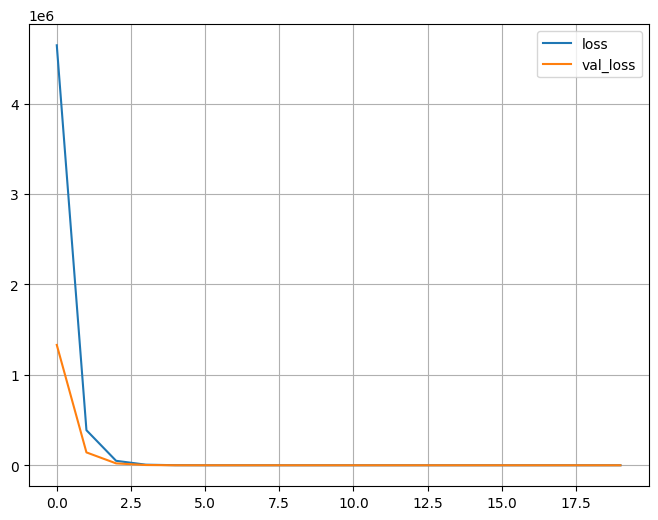

In [96]:
import pandas as pd

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 6))
plt.grid(True)
plt.show()

In [97]:
tf.keras.backend.clear_session()
model_drop = Sequential([
    keras.Input(shape=(126,)),
    Dense(10*2,activation='relu'),
    Dense(50*2,activation='relu'),
    keras.layers.Dropout(0.2),
    Dense(1, activation='linear')])
#model_drop.summary()

model_drop.compile(loss="mse", optimizer="adam",metrics=['mean_squared_error','mean_absolute_error',r2_score_tf])
history_drop=model_drop.fit(X_train_80,
                  Y_train_80,
                  epochs=20,
                  batch_size=64,
                  verbose=1,
                  validation_split=0.2,)

Epoch 1/20
20/20 [==============================] - 1s 11ms/step - loss: 1417425.1250 - mean_squared_error: 1417425.1250 - mean_absolute_error: 884.7802 - r2_score_tf: -29363050.0000 - val_loss: 82946.5391 - val_mean_squared_error: 82946.5391 - val_mean_absolute_error: 275.7117 - val_r2_score_tf: -1798111.0000
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 736192.8750 - mean_squared_error: 736192.8750 - mean_absolute_error: 642.0728 - r2_score_tf: -14307280.0000 - val_loss: 637.9770 - val_mean_squared_error: 637.9770 - val_mean_absolute_error: 24.1848 - val_r2_score_tf: -13812.9590
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 494828.7188 - mean_squared_error: 494828.7188 - mean_absolute_error: 529.2287 - r2_score_tf: -10115517.0000 - val_loss: 941.0076 - val_mean_squared_error: 941.0076 - val_mean_absolute_error: 29.4043 - val_r2_score_tf: -20383.5430
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 300255.3125 

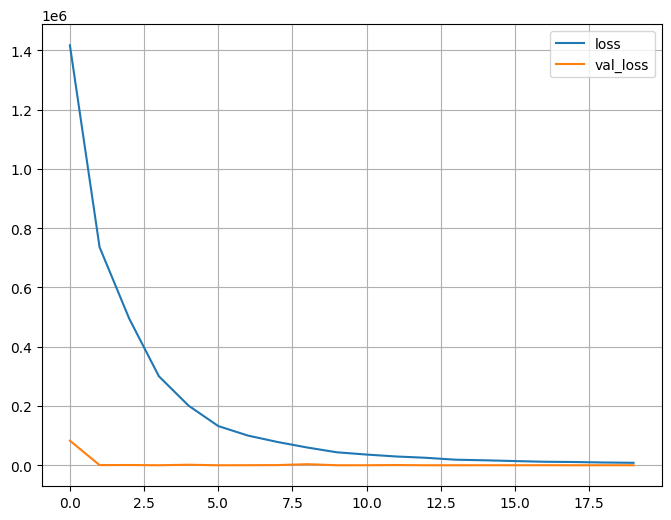

In [98]:
import pandas as pd

pd.DataFrame(history_drop.history)[['loss', 'val_loss']].plot(figsize=(8, 6))
plt.grid(True)
plt.show()

"dorp" does not improve model performance in my case
I tryed dorp rates with [0.2, 0.3, 0.4, 0.5]

3. Compare the performance of the MLP from 2.5 and the best performing `Keras` MLP. Which performs better? Use whichever one performs better in section 2.7.

In [99]:
mlp_keras_best = model
y_pred = mlp_keras_best.predict(X_validation_20)
mlp_keras_best_metrics = p2_metrics(Y_validation_20, y_pred)
print("\nmlp_keras_best Metrics:")
for metric in mlp_keras_best_metrics:
    print(metric+":",mlp_keras_best_metrics[metric])

mlp_scikit_best
y_pred = mlp_scikit_best.predict(X_validation_20)
mlp_scikit_best_metrics = p2_metrics(Y_validation_20, y_pred)
print("\nmlp_scikit_best Metrics:")
for metric in mlp_scikit_best_metrics:
    print(metric+":",mlp_scikit_best_metrics[metric])

13/13 [==============================] - 0s 3ms/step

mlp_keras_best Metrics:
mse: 1.3326286875281912
mae: 0.9486018482679712
r2: -24.282098253772386

mlp_scikit_best Metrics:
mse: 0.05481642328872547
mae: 0.17652104076818464
r2: -0.03995524970763231


mlp that made with keras is better, bacause it has smaller mse and mae

## 2.7 Final Models

1. Using the full training set (**training + validation**), train *two* linear regression models, one with and without PCA preprocessing, then apply them to the test set. For the regularized model, you can utilize the best model found during cross-validation across all three methods, while for the MLP model choose either the Scikit-learn or Keras model, and just apply these two best models (regularized and MLP) to the test set.
2. Create a bar chart of the three regression metrics for each model on the same plot.
3. How do the models' performances compare? What do the metrics reveal about the dataset?

In [100]:
model_no_pca = LinearRegression().fit(X_train_80,Y_train_80)

model_pcl = LinearRegression().fit(reduced_X_train_80,Y_train_80)

model_regularized = Lasso(alpha=0.0005, random_state=2385).fit(X_train_80,Y_train_80)

tf.keras.backend.clear_session()
model_mlp = Sequential([keras.Input(shape=(126,)),
                        Dense(10*2,activation='relu'),
                        Dense(50*2,activation='relu'),
                        Dense(1, activation='linear')])
model_mlp.compile(loss="mse", optimizer="adam",metrics=['mean_squared_error','mean_absolute_error',r2_score_tf])
history=model_mlp.fit(X_train_80,
                  Y_train_80,
                  epochs=20,
                  batch_size=64,
                  verbose=1,
                  validation_split=0.2)
#model.predict(X_test_20)
p2_metrics_scorer(model_mlp,X_test_20,Y_test_20)

Epoch 1/20
20/20 [==============================] - 1s 11ms/step - loss: 58248.4531 - mean_squared_error: 58248.4531 - mean_absolute_error: 190.3555 - r2_score_tf: -1259296.7500 - val_loss: 163.3864 - val_mean_squared_error: 163.3864 - val_mean_absolute_error: 12.2755 - val_r2_score_tf: -3550.7058
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 4164.0366 - mean_squared_error: 4164.0366 - mean_absolute_error: 52.2063 - r2_score_tf: -83878.6484 - val_loss: 1531.4246 - val_mean_squared_error: 1531.4246 - val_mean_absolute_error: 37.4884 - val_r2_score_tf: -33217.7812
Epoch 3/20
20/20 [==============================] - 0s 3ms/step - loss: 686.8207 - mean_squared_error: 686.8207 - mean_absolute_error: 21.5064 - r2_score_tf: -12921.8457 - val_loss: 50.3617 - val_mean_squared_error: 50.3617 - val_mean_absolute_error: 6.7502 - val_r2_score_tf: -1086.6418
Epoch 4/20
20/20 [==============================] - 0s 3ms/step - loss: 62.4140 - mean_squared_error: 62.4140 - mean_

{'mse': -0.2060251555916031,
 'mae': -0.36009753370455655,
 'r2': 2.542783212891893}

In [101]:
# p2_metrics_scorer(model,x,y_true)
model_no_pca_rs = p2_metrics_scorer(model_no_pca,X_test_20,Y_test_20)
print(model_no_pca_rs)
model_pcl_rs = p2_metrics_scorer(model_pcl,reduced_X_test_20,Y_test_20)
print(model_pcl_rs)
model_regularized_rs = p2_metrics_scorer(model_regularized,X_test_20,Y_test_20)
print(model_regularized_rs)
model_mlp_rs = p2_metrics_scorer(model_mlp,X_test_20, Y_test_20)
print(model_mlp_rs)

{'mse': -0.020608518036012095, 'mae': -0.1038843696504192, 'r2': -0.6456184608578004}
{'mse': -0.058361018798619886, 'mae': -0.18306862100662247, 'r2': 0.00356889474639277}
{'mse': -0.01973299192832576, 'mae': -0.09951704385981584, 'r2': -0.6606739000242113}
13/13 [==============================] - 0s 1ms/step
{'mse': -0.2060251555916031, 'mae': -0.36009753370455655, 'r2': 2.542783212891893}


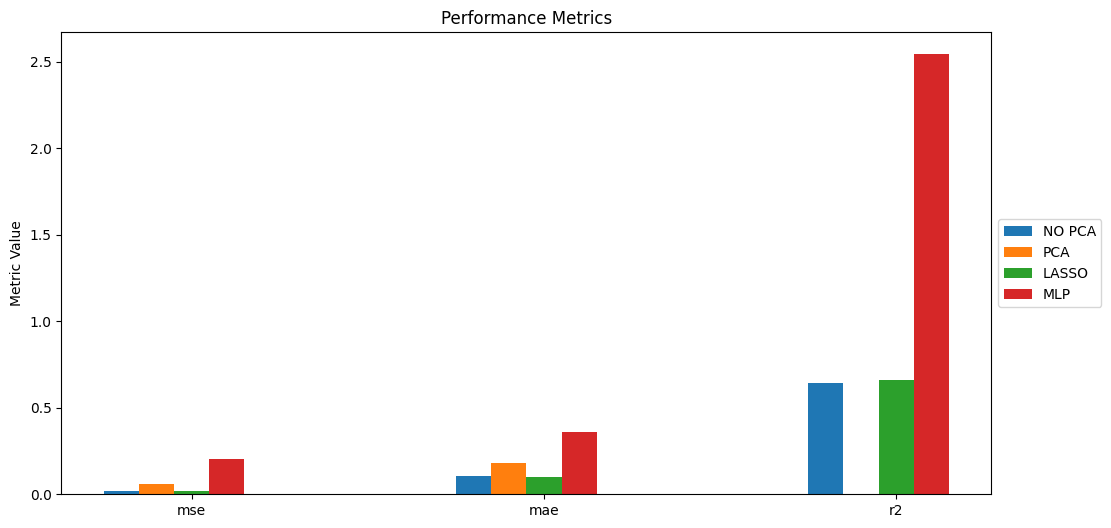

In [106]:
labels=metric_keys
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

no_pca_data = [abs(model_no_pca_rs[l]) for l in labels]
pcl_data = [abs(model_pcl_rs[l]) for l in labels]
regularized_data = [abs(model_regularized_rs[l]) for l in labels]
mlp_data = [abs(model_mlp_rs[l]) for l in labels]

fig, ax = plt.subplots()
plt.bar(x - (width*2), no_pca_data, width, label = 'NO PCA') 
plt.bar(x - width    , pcl_data, width, label = 'PCA') 
plt.bar(x            , regularized_data, width, label = 'LASSO') 
plt.bar(x + width  , mlp_data, width, label = 'MLP') 

ax.set_ylabel('Metric Value')
ax.set_title('Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


if i put MLP's data togther with others, the MLP'bars value are too high, which makes other three almost invisible
so split it out

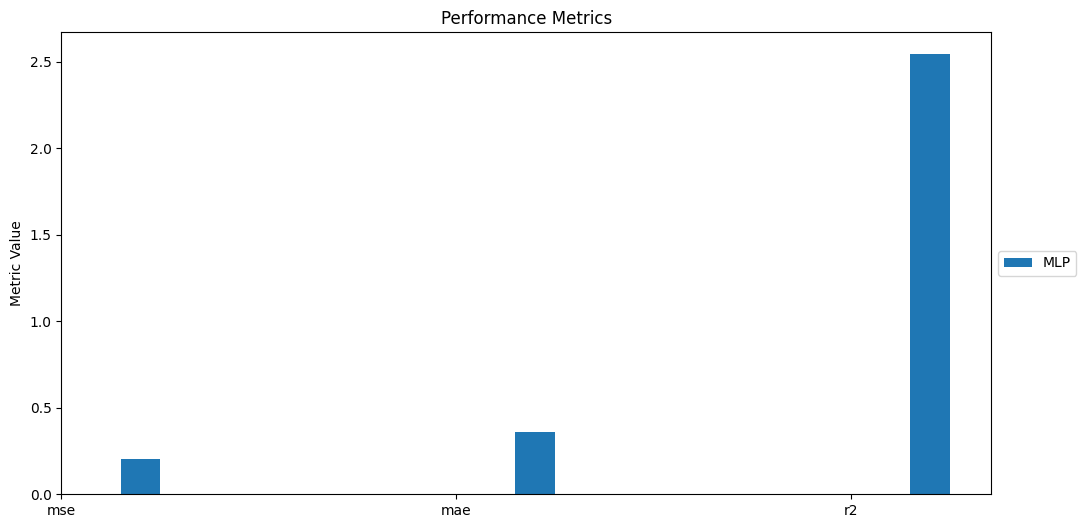

In [103]:
# labels=metric_keys
# x = np.arange(len(labels))  
# width = 0.1 

# fig, ax = plt.subplots()
# plt.bar(x + width*2  , mlp_data, width, label = 'MLP') 

# ax.set_ylabel('Metric Value')
# ax.set_title('Performance Metrics')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()